# Inputting a very small subset of the data to clean and understand shape of data

-Beth Stankevich (09/2015) 


1. Load consolidated.csv with age, race, sex, ses, health status columns
2. Format those columns such that they can be used as features in a model
3. Load conditions.csv with health status columns
4. Format those columns such that they can be used as features in a model
5. Bring in Expenditure data
6. Output cls_lbl.csv for use in modeling


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd ../Desktop/Insight/2012_MEPS/

/Users/bstankev/Desktop/Insight/2012_MEPS


### Load consolidated.csv 
#### load only desired variables for age, race, sex, ses, health status

In [4]:
# load MEPS dataset with only a subset of columns
# chose columns based on general knowledge of what might be important for healthcare 
# along with a better reading of the MEPS website 
MEPS_fsub = pd.read_csv('consolidated.csv', 
                        usecols=["DUID", "PID", "DUPERSID", 
                                 "AGE31X", "AGE42X", "AGE53X",
                                 "AGE12X", "AGELAST", "DOBMM", 
                                 "DOBYY", "SEX", "RACEVER", 
                                 "RACEV1X", "RACEAX", "RACEBX",
                                 "RACEWX", "RACETHX", "HISPANX",
                                 "HISPCAT", "POVCAT12", "POVLEV12",
                                 "RTHLTH31", "RTHLTH42", "RTHLTH53",
                                 "MNHLTH31", "MNHLTH42", "MNHLTH53"])

In [5]:
MEPS_fsub.shape

(38974, 27)

In [6]:
MEPS_fsub.head()

,DUID,PID,DUPERSID,AGE31X,AGE42X,AGE53X,AGE12X,AGELAST,DOBMM,DOBYY,...,HISPANX,HISPCAT,RTHLTH31,RTHLTH42,RTHLTH53,MNHLTH31,MNHLTH42,MNHLTH53,POVCAT12,POVLEV12
0,20004,101,20004101,38,38,38,38,38,1 JANUARY,1974,...,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN,1 EXCELLENT,2 VERY GOOD,4 FAIR,3 GOOD,2 VERY GOOD,1 EXCELLENT,5 HIGH INCOME,450.75
1,20004,102,20004102,38,38,39,39,39,12 DECEMBER,1973,...,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,5 HIGH INCOME,450.75
2,20004,103,20004103,9,9,10,9,9,1 JANUARY,2003,...,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN,1 EXCELLENT,2 VERY GOOD,2 VERY GOOD,1 EXCELLENT,2 VERY GOOD,2 VERY GOOD,5 HIGH INCOME,450.75
3,20005,101,20005101,50,51,51,51,51,7 JULY,1961,...,1 HISPANIC,3 DOMINICAN,4 FAIR,4 FAIR,4 FAIR,1 EXCELLENT,3 GOOD,3 GOOD,3 LOW INCOME,132.80
4,20005,102,20005102,20,21,21,21,21,5 MAY,1991,...,1 HISPANIC,3 DOMINICAN,1 EXCELLENT,3 GOOD,1 EXCELLENT,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,3 LOW INCOME,132.80


In [7]:
#use AGELAST as single age value (don't need all of the superfluous age data)
ndf = MEPS_fsub.drop(['AGE31X','AGE42X','AGE53X','AGE12X', 'DOBMM','DOBYY'], axis=1)

In [9]:
#what columns need to changed to integers/floats
ndf.dtypes

DUID          int64
PID           int64
DUPERSID      int64
AGELAST       int64
SEX          object
RACEVER      object
RACEV1X      object
RACEAX       object
RACEBX       object
RACEWX       object
RACETHX      object
HISPANX      object
HISPCAT      object
RTHLTH31     object
RTHLTH42     object
RTHLTH53     object
MNHLTH31     object
MNHLTH42     object
MNHLTH53     object
POVCAT12     object
POVLEV12    float64
dtype: object

In [10]:
ndf.shape

(38974, 21)

# Alter and Understand Features

1. string to integer/float
2. drop columns in needed
3. plot shape of data

## Sex column

In [11]:
# get rid of string information in column, keep integer information
# change string to integer

# Male = 1
# Female = 2
ndf['SEX'] = ndf['SEX'].str.split(' ').str[0]

In [12]:
# set SEX as a float (instead of a string)
ndf['SEX'] = ndf.SEX.astype(float)

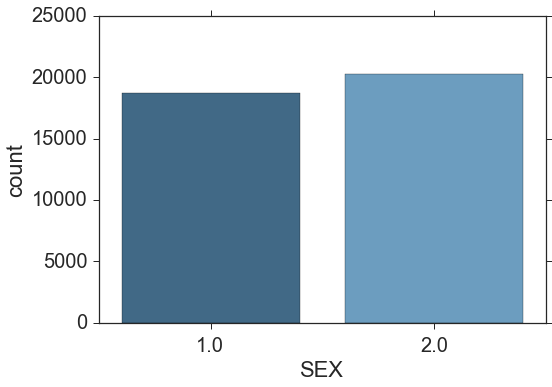

In [13]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

sns.countplot(ndf.SEX, palette="Blues_d")

## Race columns

1 WHITE - NO OTHER RACE REPORTED

2 BLACK - NO OTHER RACE REPORTED

3 AMER INDIAN/ALASKA NATIVE-NO OTHER RACE

4 ASIAN - NO OTHER RACE REPORTED

5 NATIVE HAWAIIAN/PACIFIC ISLANDER-NO OTHR
 
6 MULTIPLE RACES REPORTED',
      


In [15]:
ndf[['RACEVER', 'RACEV1X', 'RACEAX', 
     'RACEBX', 'RACEWX', 'HISPANX', 'HISPCAT']].head()

,RACEVER,RACEV1X,RACEAX,RACEBX,RACEWX,HISPANX,HISPCAT
0,1 OLD RACE QUESTIONS,1 WHITE - NO OTHER RACE REPORTED,3 ALL OTHER RACE ASSIGNMENTS,3 ALL OTHER RACE ASSIGNMENTS,1 WHITE - NO OTHER RACE REPORTED,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN
1,1 OLD RACE QUESTIONS,1 WHITE - NO OTHER RACE REPORTED,3 ALL OTHER RACE ASSIGNMENTS,3 ALL OTHER RACE ASSIGNMENTS,1 WHITE - NO OTHER RACE REPORTED,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN
2,1 OLD RACE QUESTIONS,1 WHITE - NO OTHER RACE REPORTED,3 ALL OTHER RACE ASSIGNMENTS,3 ALL OTHER RACE ASSIGNMENTS,1 WHITE - NO OTHER RACE REPORTED,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN
3,1 OLD RACE QUESTIONS,1 WHITE - NO OTHER RACE REPORTED,3 ALL OTHER RACE ASSIGNMENTS,3 ALL OTHER RACE ASSIGNMENTS,1 WHITE - NO OTHER RACE REPORTED,1 HISPANIC,3 DOMINICAN
4,1 OLD RACE QUESTIONS,1 WHITE - NO OTHER RACE REPORTED,3 ALL OTHER RACE ASSIGNMENTS,3 ALL OTHER RACE ASSIGNMENTS,1 WHITE - NO OTHER RACE REPORTED,1 HISPANIC,3 DOMINICAN


In [16]:
ndf['RACEV1X'].unique()

array(['1 WHITE - NO OTHER RACE REPORTED',
       '2 BLACK - NO OTHER RACE REPORTED',
       '4 ASIAN - NO OTHER RACE REPORTED', '6 MULTIPLE RACES REPORTED',
       '5 NATIVE HAWAIIAN/PACIFIC ISLANDER-NO OTHR',
       '3 AMER INDIAN/ALASKA NATIVE-NO OTHER RACE'], dtype=object)

In [17]:
# drop all race categories but most basic category : RACEV1X
ndf2 = ndf.drop(['RACEVER', 'RACEAX',
                 'RACEBX', 'RACEWX', 'HISPANX', 'HISPCAT', 'RACETHX'], axis = 1)

In [18]:
ndf2.head()

,DUID,PID,DUPERSID,AGELAST,SEX,RACEV1X,RTHLTH31,RTHLTH42,RTHLTH53,MNHLTH31,MNHLTH42,MNHLTH53,POVCAT12,POVLEV12
0,20004,101,20004101,38,1,1 WHITE - NO OTHER RACE REPORTED,1 EXCELLENT,2 VERY GOOD,4 FAIR,3 GOOD,2 VERY GOOD,1 EXCELLENT,5 HIGH INCOME,450.75
1,20004,102,20004102,39,2,1 WHITE - NO OTHER RACE REPORTED,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,5 HIGH INCOME,450.75
2,20004,103,20004103,9,2,1 WHITE - NO OTHER RACE REPORTED,1 EXCELLENT,2 VERY GOOD,2 VERY GOOD,1 EXCELLENT,2 VERY GOOD,2 VERY GOOD,5 HIGH INCOME,450.75
3,20005,101,20005101,51,1,1 WHITE - NO OTHER RACE REPORTED,4 FAIR,4 FAIR,4 FAIR,1 EXCELLENT,3 GOOD,3 GOOD,3 LOW INCOME,132.80
4,20005,102,20005102,21,1,1 WHITE - NO OTHER RACE REPORTED,1 EXCELLENT,3 GOOD,1 EXCELLENT,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,3 LOW INCOME,132.80


In [19]:
# get rid of string information in column, keep integer information
# change string to integer

# 1 = WHITE - NO OTHER RACE REPORTED
# 2 = BLACK - NO OTHER RACE REPORTED
# 3 = AMER INDIAN/ALASKA NATIVE-NO OTHER RACE
# 4 = ASIAN - NO OTHER RACE REPORTED
# 5 = NATIVE HAWAIIAN/PACIFIC ISLANDER-NO OTHR
# 6 MULTIPLE RACES REPORTED

ndf2['RACEV1X'] = ndf2['RACEV1X'].str.split(' ').str[0].astype(float)

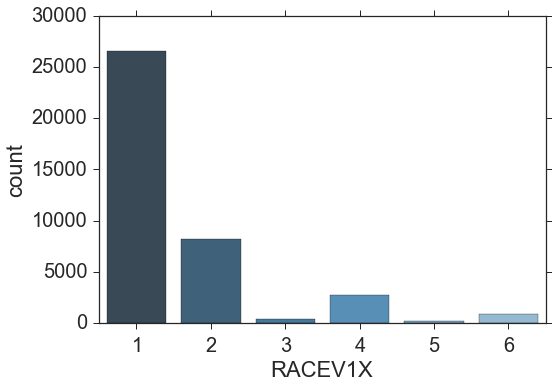

In [21]:
# mostly white and black people (asian people have 3rd highest representation) 
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

sns.countplot(ndf2.RACEV1X, palette = 'Blues_d', order=[1,2,3,4,5,6])

## Poverty columns

POVCAT12

1 = POOR/NEGATIVE  
2 = NEAR POOR  
3 = LOW INCOME  
4 = MIDDLE INCOME  
5 = HIGH INCOME


In [22]:
ndf2[['POVCAT12','POVLEV12']]

,POVCAT12,POVLEV12
0,5 HIGH INCOME,450.75
1,5 HIGH INCOME,450.75
2,5 HIGH INCOME,450.75
3,3 LOW INCOME,132.80
4,3 LOW INCOME,132.80
5,3 LOW INCOME,132.80
6,4 MIDDLE INCOME,257.59
7,4 MIDDLE INCOME,257.59
8,4 MIDDLE INCOME,257.59
9,4 MIDDLE INCOME,257.59


In [25]:
ndf2.POVCAT12.unique()

array(['5 HIGH INCOME', '3 LOW INCOME', '4 MIDDLE INCOME',
       '1 POOR/NEGATIVE', '2 NEAR POOR'], dtype=object)

In [26]:
# get rid of string information in column, keep integer information
# change string to integer

# 1 = POOR/NEGATIVE
# 2 = NEAR POOR
# 3 = LOW INCOME
# 4 = MIDDLE INCOME
# 5 = HIGH INCOME

ndf2['POVCAT12'] = ndf2['POVCAT12'].str.split(' ').str[0].astype(float)

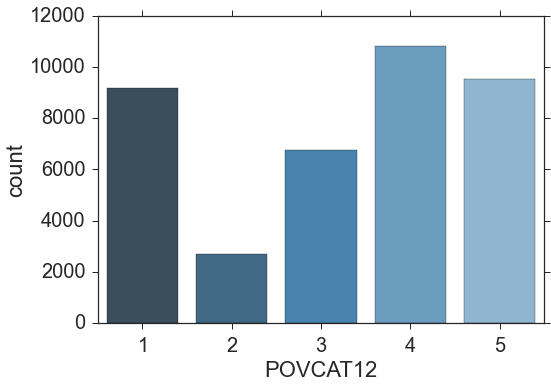

In [27]:
# survey oversamples poor people hence the U-shape in the histogram
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

sns.countplot(ndf2.POVCAT12, palette = 'Blues_d', order=[1,2,3,4,5])

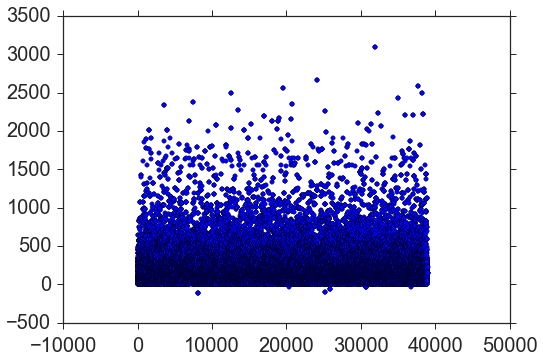

In [29]:
# look at spread of POVLEV12 data
# people are mostly concentrated <500 
x = range(len(ndf2.POVCAT12))
plt.scatter(x, ndf2.POVLEV12)

# Age column

-Create Age groups (possible view to make developmentally important age groups)

In [30]:
# first past age grouping
# may not be used later
ndf2['AGELAST']

ndf2['ageGrp'] = 1
ndf2.ix[(ndf2['AGELAST'] >= 0) & (ndf2['AGELAST'] <= 10), 'ageGrp'] = 1 # Age 0-10
ndf2.ix[(ndf2['AGELAST'] >= 11) & (ndf2['AGELAST'] <= 20), 'ageGrp'] = 2 # Age 11-20  
ndf2.ix[(ndf2['AGELAST'] >= 21) & (ndf2['AGELAST'] <= 30), 'ageGrp'] = 3 # Age 21-30  
ndf2.ix[(ndf2['AGELAST'] >= 31) & (ndf2['AGELAST'] <= 40), 'ageGrp'] = 4 # Age 31-40 
ndf2.ix[(ndf2['AGELAST'] >= 41) & (ndf2['AGELAST'] <= 50), 'ageGrp'] = 5 # Age 41-50  
ndf2.ix[(ndf2['AGELAST'] >= 51) & (ndf2['AGELAST'] <= 60), 'ageGrp'] = 6 # Age 51-60  
ndf2.ix[(ndf2['AGELAST'] >= 61) & (ndf2['AGELAST'] <= 70), 'ageGrp'] = 7 # Age 61-70  
ndf2.ix[ndf2['AGELAST'] >= 70, 'ageGrp'] = 8 # 70+
        

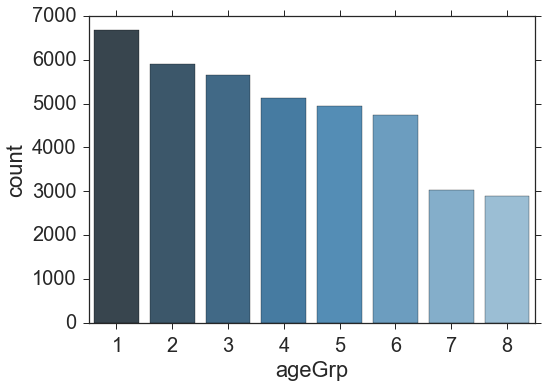

In [32]:
# More younger people that older people
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

sns.countplot(ndf2.ageGrp, palette = 'Blues_d', order=[1,2,3,4,5,6,7,8])

## Health Status columns

This represents a survey question that was repeated across the 3 interviews  

 "compared to other people of (PERSON)'s age, would
 you say that (PERSON)'s health is excellent, very good, good,
 fair, or poor?"

In [33]:
ndf2[['RTHLTH31', 'RTHLTH42', 'RTHLTH53']]

,RTHLTH31,RTHLTH42,RTHLTH53
0,1 EXCELLENT,2 VERY GOOD,4 FAIR
1,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT
2,1 EXCELLENT,2 VERY GOOD,2 VERY GOOD
3,4 FAIR,4 FAIR,4 FAIR
4,1 EXCELLENT,3 GOOD,1 EXCELLENT
5,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
6,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
7,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
8,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
9,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT


In [34]:
# get rid of string information in column, keep integer information
# change string to integer

# 1 = EXCELLENT
# 2 = VERY GOOD
# 3 = GOOD
# 4 = FAIR
# 5 = POOR
# -1, -9, -7, -8 -> need to change to NaN

ndf2['RTHLTH31'] = ndf2['RTHLTH31'].str.split(' ').str[0].astype(float)
ndf2['RTHLTH42'] = ndf2['RTHLTH42'].str.split(' ').str[0].astype(float)
ndf2['RTHLTH53'] = ndf2['RTHLTH53'].str.split(' ').str[0].astype(float)

In [43]:
# change negative numbers to NaN
ndf2.ix[ndf2.RTHLTH31 < 0] = np.nan
ndf2.ix[ndf2.RTHLTH42 < 0] = np.nan
ndf2.ix[ndf2.RTHLTH53 < 0] = np.nan

In [44]:
# create one single average value for all 3 survey response
ndf2['HLTHSTAT'] = ndf2[['RTHLTH31', 'RTHLTH42', 'RTHLTH53']].mean(axis=1)

In [45]:
ndf2.head()

,DUID,PID,DUPERSID,AGELAST,SEX,RACEV1X,RTHLTH31,RTHLTH42,RTHLTH53,MNHLTH31,MNHLTH42,MNHLTH53,POVCAT12,POVLEV12,ageGrp,HLTHSTAT
0,20004,101,20004101,38,1,1,1,2,4,3 GOOD,2 VERY GOOD,1 EXCELLENT,5,450.75,4,2.333333
1,20004,102,20004102,39,2,1,1,2,1,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,5,450.75,4,1.333333
2,20004,103,20004103,9,2,1,1,2,2,1 EXCELLENT,2 VERY GOOD,2 VERY GOOD,5,450.75,1,1.666667
3,20005,101,20005101,51,1,1,4,4,4,1 EXCELLENT,3 GOOD,3 GOOD,3,132.80,6,4.000000
4,20005,102,20005102,21,1,1,1,3,1,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT,3,132.80,3,1.666667


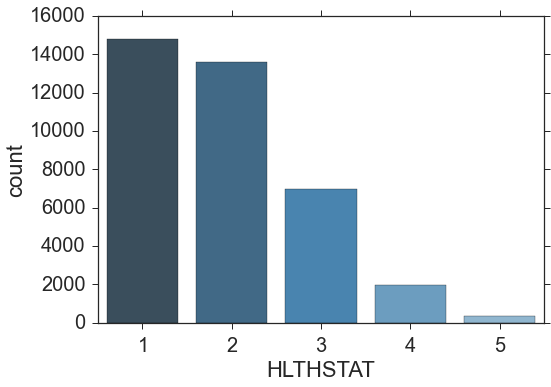

In [46]:
# Most people feel good
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

h = np.floor(ndf2.HLTHSTAT)
sns.countplot(h, palette="Blues_d", order=[1,2,3,4,5])

## Mental Health Status Columns

This represents a survey question that was repeated across the 3 interviews  

 "In general, would you say that (PERSON)'s mental health is
 excellent, very good, good, fair, or poor?"

In [47]:
ndf2[['MNHLTH31', 'MNHLTH42', 'MNHLTH53']]

,MNHLTH31,MNHLTH42,MNHLTH53
0,3 GOOD,2 VERY GOOD,1 EXCELLENT
1,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT
2,1 EXCELLENT,2 VERY GOOD,2 VERY GOOD
3,1 EXCELLENT,3 GOOD,3 GOOD
4,1 EXCELLENT,2 VERY GOOD,1 EXCELLENT
5,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
6,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
7,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
8,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT
9,1 EXCELLENT,1 EXCELLENT,1 EXCELLENT


In [48]:
# get rid of string information in column, keep integer information
# change string to integer

# 1 = EXCELLENT
# 2 = VERY GOOD
# 3 = GOOD
# 4 = FAIR
# 5 = POOR
# -1, -9, -7, -8 -> need to change to NaN

ndf2['MNHLTH31'] = ndf2['MNHLTH31'].str.split(' ').str[0].astype(float)
ndf2['MNHLTH42'] = ndf2['MNHLTH42'].str.split(' ').str[0].astype(float)
ndf2['MNHLTH53'] = ndf2['MNHLTH53'].str.split(' ').str[0].astype(float)

In [49]:
# change negative numbers to NaN
ndf2.ix[ndf2.MNHLTH31 < 0] = np.nan
ndf2.ix[ndf2.MNHLTH42 < 0] = np.nan
ndf2.ix[ndf2.MNHLTH53 < 0] = np.nan

In [50]:
# create a single average value for all three survey questions
ndf2['MNHLTHSTAT'] = ndf2[['MNHLTH31', 'MNHLTH42', 'MNHLTH53']].mean(axis=1)

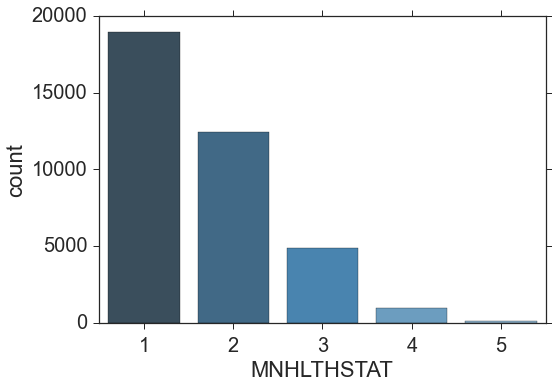

In [51]:
# people feel good mentally
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

m = np.floor(ndf2.MNHLTHSTAT)
sns.countplot(m, palette="Blues_d", order=[1,2,3,4,5])

# Inspect the changes made!

In [52]:
ndf2.head()

,DUID,PID,DUPERSID,AGELAST,SEX,RACEV1X,RTHLTH31,RTHLTH42,RTHLTH53,MNHLTH31,MNHLTH42,MNHLTH53,POVCAT12,POVLEV12,ageGrp,HLTHSTAT,MNHLTHSTAT
0,20004,101,20004101,38,1,1,1,2,4,3,2,1,5,450.75,4,2.333333,2.000000
1,20004,102,20004102,39,2,1,1,2,1,1,2,1,5,450.75,4,1.333333,1.333333
2,20004,103,20004103,9,2,1,1,2,2,1,2,2,5,450.75,1,1.666667,1.666667
3,20005,101,20005101,51,1,1,4,4,4,1,3,3,3,132.80,6,4.000000,2.333333
4,20005,102,20005102,21,1,1,1,3,1,1,2,1,3,132.80,3,1.666667,1.333333


# Quick plot

not super useful because my data is primarily categorical

### Make a seaborn plot comparing the features
#### look for correlated features (possible source of data to be dropped)

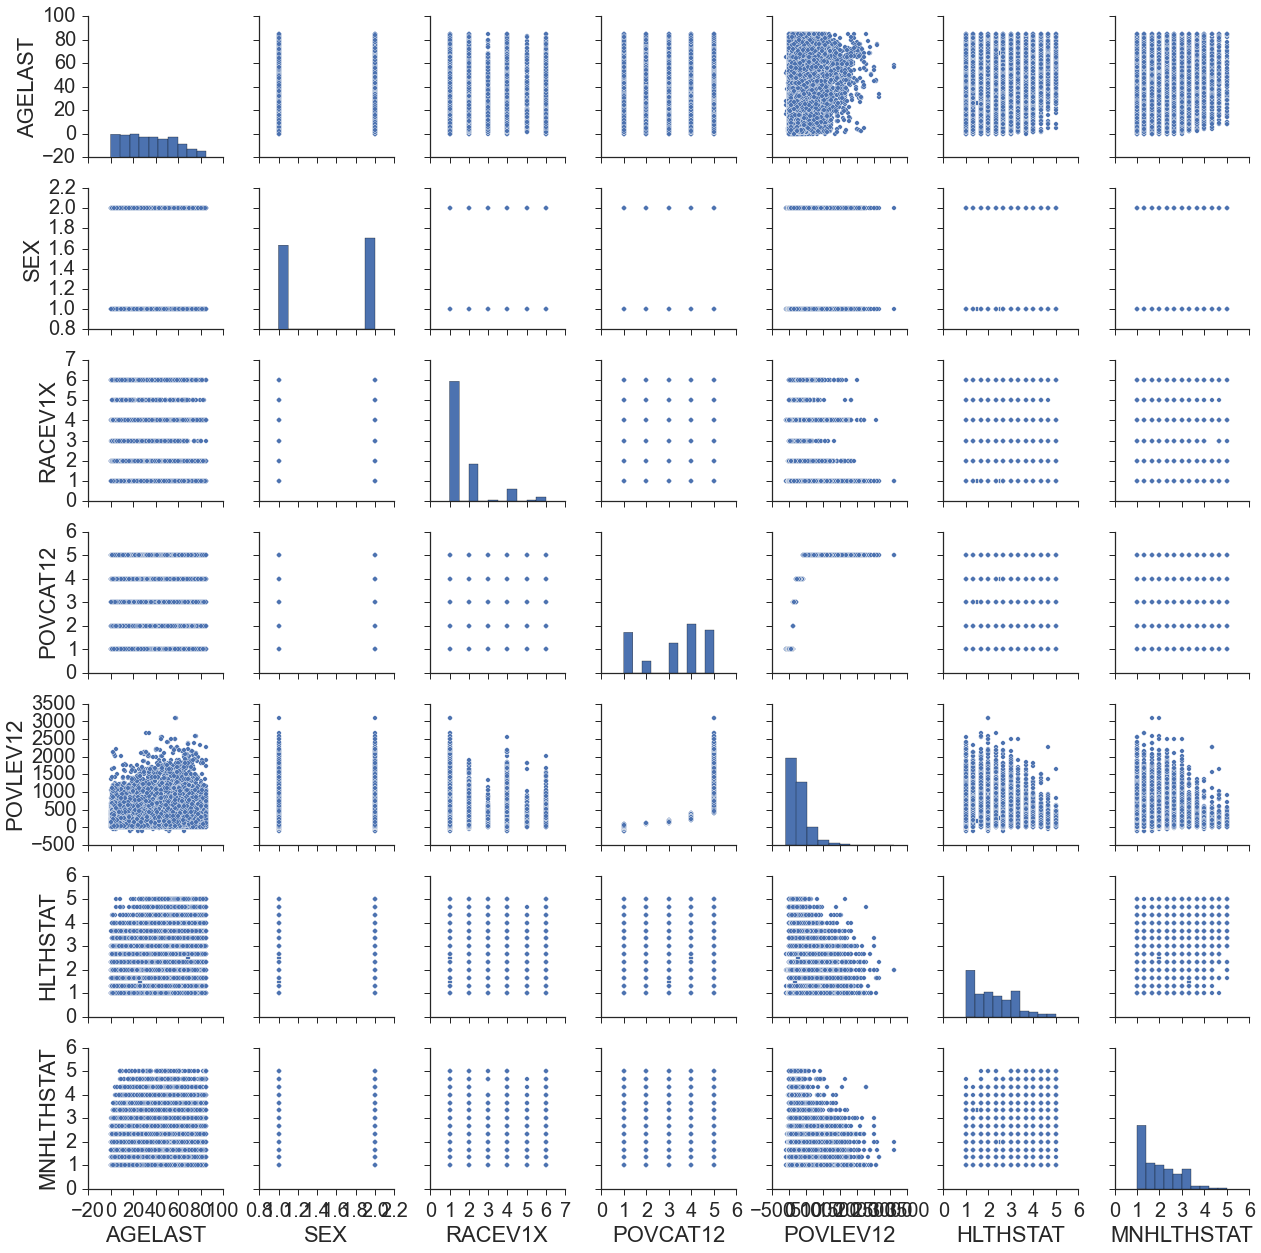

In [54]:
sns_data = ndf2[['AGELAST', 'SEX', 'RACEV1X', 'POVCAT12', 'POVLEV12','HLTHSTAT','MNHLTHSTAT']]
sns.pairplot(sns_data.dropna())

# Load expenditure columns from consolidated.csv to use as labels 

In [55]:
# load a few basic expenditure columns from consolidated.csv
expdtr = pd.read_csv('consolidated.csv', 
                        usecols=["DUID", "PID", "DUPERSID", 
                                 "OPVEXP12", "OPOEXP12", "OBDEXP12",
                                 "OBVEXP12", "ERTEXP12", "ERTTCH12", 
                                 "ERTOT12", "IPTEXP12", "IPTTCH12", 
                                 "HHTOTD12", "HHATCH12", "HHAEXP12",
                                 "RXTOT12", "RXEXP12", "OBTOTV12",
                                 "OBVTCH12", "TOTTCH12", "TOTEXP12", 
                                 "OBDTCH12","OBOTCH12"])

In [56]:
expdtr.head()

,DUID,PID,DUPERSID,TOTTCH12,TOTEXP12,OBTOTV12,OBVTCH12,OBVEXP12,OBDTCH12,OBDEXP12,...,ERTOT12,ERTTCH12,ERTEXP12,IPTEXP12,IPTTCH12,HHTOTD12,HHATCH12,HHAEXP12,RXTOT12,RXEXP12
0,20004,101,20004101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20004,102,20004102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20004,103,20004103,75,75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20005,101,20005101,1100,745,5,1100,451,1100,451,...,0,0,0,0,0,0,0,0,35,294
4,20005,102,20005102,490,127,1,490,127,490,127,...,0,0,0,0,0,0,0,0,0,0


# Too many expenditures, constrain to ones mentioned as being important

In [57]:
df = expdtr[["DUID", "PID", "DUPERSID",
             'OBVTCH12', 'OBVEXP12', 'ERTTCH12', 'ERTEXP12', 
             'IPTTCH12', 'IPTEXP12', 'HHATCH12', 'HHAEXP12', 
             'RXEXP12', 'TOTTCH12', 'TOTEXP12']]

In [58]:
df.head()

,DUID,PID,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,IPTEXP12,HHATCH12,HHAEXP12,RXEXP12,TOTTCH12,TOTEXP12
0,20004,101,20004101,0,0,0,0,0,0,0,0,0,0,0
1,20004,102,20004102,0,0,0,0,0,0,0,0,0,0,0
2,20004,103,20004103,0,0,0,0,0,0,0,0,0,75,75
3,20005,101,20005101,1100,451,0,0,0,0,0,0,294,1100,745
4,20005,102,20005102,490,127,0,0,0,0,0,0,0,490,127


In [59]:
# have a lot of '0' in the data, not quite sure if that represents $0 spent, or declining to answer
# for now, going to treat as NaN while I decide how to procedd
df2 = df.replace(0, 'NaN').astype(float)

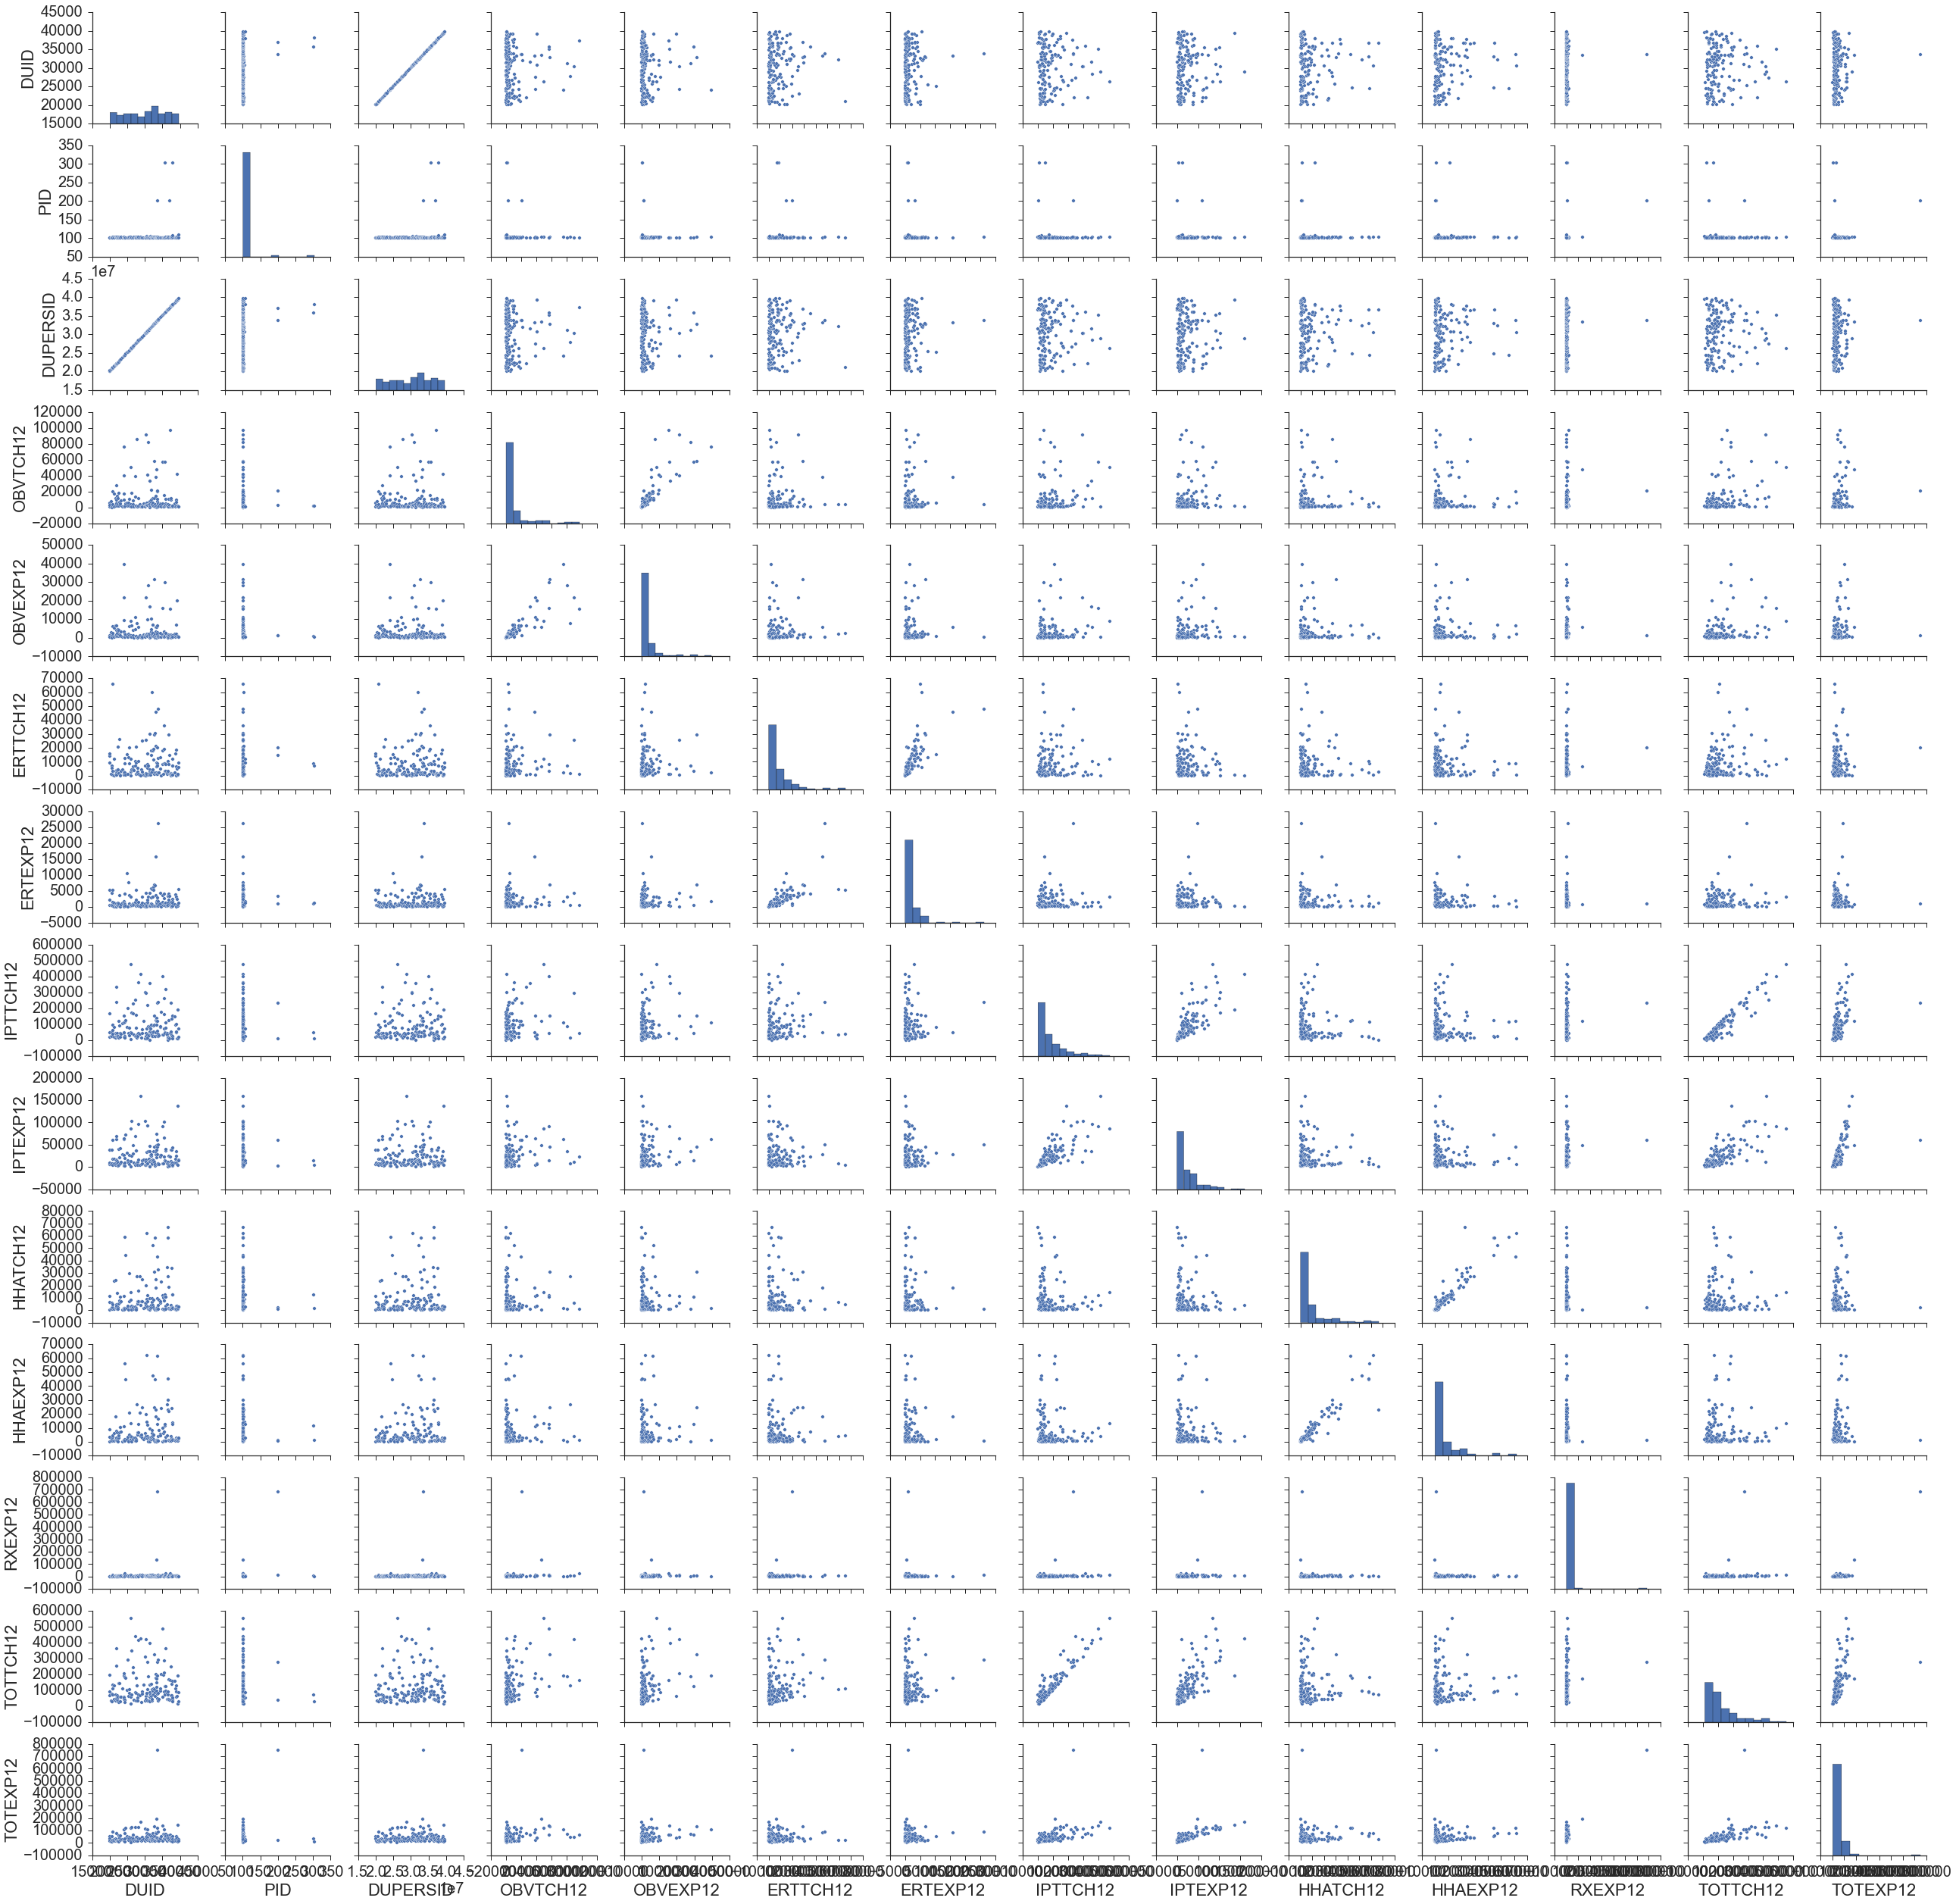

In [60]:
# look at relationship btw different spending types
sns.pairplot(df2.dropna())

# look at size of expenditure data

In [65]:
print("People with Inpatient visits: {0}".format(len(df2.IPTEXP12.dropna())))
print("People with Home Health visits: {0}".format(len(df2.HHAEXP12.dropna())))
print("People with ER visits: {0}".format(len(df2.ERTEXP12.dropna())))
print("People with Office-based visits: {0}".format(len(df2.OBVEXP12.dropna())))
print("People with Prescriptions: {0}".format(len(df2.RXEXP12.dropna())))
print("People with Total expenditures: {0}".format(len(df2.TOTEXP12.dropna())))

People with Inpatient visits: 2361
People with Home Health visits: 667
People with ER visits: 4627
People with Office-based visits: 24274
People with Prescriptions: 20376
People with Total expenditures: 29807


In [66]:
n = [29807, 24274, 20376, 4627, 2361, 667]
l = ['TOTEXP12', 'OBVEXP12','RXEXP12','ERTEXP12','IPTEXP12','HHAEXP12']
s = [1,2,3,4,5,6]

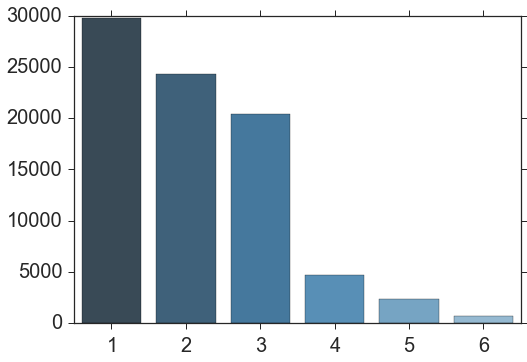

In [67]:
# plot size of data (number of rows) for each expenditure type of interest
sns.barplot(s,n, palette='Blues_d')

# Create feature and class df for analysis

Merge feature data with expenditure (class) data

In [68]:
cls_lbl = pd.merge(left=df2,right=ndf2, on='DUPERSID')

In [69]:
cls_lbl.head()

,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,IPTEXP12,HHATCH12,...,RTHLTH42,RTHLTH53,MNHLTH31,MNHLTH42,MNHLTH53,POVCAT12,POVLEV12,ageGrp,HLTHSTAT,MNHLTHSTAT
0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,3,2,1,5,450.75,4,2.333333,2.000000
1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,1,2,1,5,450.75,4,1.333333,1.333333
2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,1,2,2,5,450.75,1,1.666667,1.666667
3,20005,101,20005101,1100,451,NaN,NaN,NaN,NaN,NaN,...,4,4,1,3,3,3,132.80,6,4.000000,2.333333
4,20005,102,20005102,490,127,NaN,NaN,NaN,NaN,NaN,...,3,1,1,2,1,3,132.80,3,1.666667,1.333333


# Save cls_lbl as csv for further use

In [70]:
cls_lbl.to_csv('cls_lbl.csv')